In [1]:
!pip install xgboost
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FINAL_DF = pd.read_csv("C:\\Users\\Tong\\Desktop\\Northeastern\\CPS ANALYTICS\\ALY6040 DATA MINING\\WEEK5\\final_df.csv")
FINAL_DF

,LIVING_AREA,TOTAL_VALUE,YR_REMODEL,TT_RMS,Condition,School,Crime
0,2307.0,811800,2000,9,AVG,B,F
1,2268.0,796300,1985,13,AVG,B,F
2,2028.0,727900,1991,11,AVG,B,F
3,2546.0,794800,1978,13,AVG,B,F
4,4362.0,1288300,2018,20,AVG,B,F
...,...,...,...,...,...,...,...
68214,5769.6,1742100,1990,15,AVG,B,C
68215,1612.0,886800,1991,8,AVG,B,C
68216,2301.6,1057800,2017,7,AVG,B,C
68217,2545.2,1126300,1995,9,AVG,B,C


In [3]:
FINAL_DF.dropna(inplace=True)
FINAL_DF

,LIVING_AREA,TOTAL_VALUE,YR_REMODEL,TT_RMS,Condition,School,Crime
0,2307.0,811800,2000,9,AVG,B,F
1,2268.0,796300,1985,13,AVG,B,F
2,2028.0,727900,1991,11,AVG,B,F
3,2546.0,794800,1978,13,AVG,B,F
4,4362.0,1288300,2018,20,AVG,B,F
...,...,...,...,...,...,...,...
68214,5769.6,1742100,1990,15,AVG,B,C
68215,1612.0,886800,1991,8,AVG,B,C
68216,2301.6,1057800,2017,7,AVG,B,C
68217,2545.2,1126300,1995,9,AVG,B,C


# Feature Engineering

In [4]:
median_value = FINAL_DF['TOTAL_VALUE'].median()
print("Median:", median_value)

Median: 688300.0


In [6]:
FINAL_DF['TOTAL_VALUE_CAT'] = FINAL_DF['TOTAL_VALUE'].apply(lambda x: 'High' if x > median_value else 'Low')
FINAL_DF.head()

,LIVING_AREA,TOTAL_VALUE,YR_REMODEL,TT_RMS,Condition,School,Crime,TOTAL_VALUE_CAT
0,2307.0,811800,2000,9,AVG,B,F,High
1,2268.0,796300,1985,13,AVG,B,F,High
2,2028.0,727900,1991,11,AVG,B,F,High
3,2546.0,794800,1978,13,AVG,B,F,High
4,4362.0,1288300,2018,20,AVG,B,F,High


In [7]:
value_counts = FINAL_DF['TOTAL_VALUE_CAT'].value_counts()

print("Counts of High and Low for TOTAL_VALUE:")
print(value_counts)

Counts of High and Low for TOTAL_VALUE:
TOTAL_VALUE_CAT
Low     33940
High    33930
Name: count, dtype: int64


Remove "TOTAL_VALUE" numeric column

In [8]:
FINAL_DF.drop(columns=['TOTAL_VALUE'], inplace=True)
FINAL_DF

,LIVING_AREA,YR_REMODEL,TT_RMS,Condition,School,Crime,TOTAL_VALUE_CAT
0,2307.0,2000,9,AVG,B,F,High
1,2268.0,1985,13,AVG,B,F,High
2,2028.0,1991,11,AVG,B,F,High
3,2546.0,1978,13,AVG,B,F,High
4,4362.0,2018,20,AVG,B,F,High
...,...,...,...,...,...,...,...
68214,5769.6,1990,15,AVG,B,C,High
68215,1612.0,1991,8,AVG,B,C,High
68216,2301.6,2017,7,AVG,B,C,High
68217,2545.2,1995,9,AVG,B,C,High


# Splitting the Data

In [9]:
X = FINAL_DF.drop(columns=['TOTAL_VALUE_CAT'])
y = FINAL_DF.TOTAL_VALUE_CAT

In [10]:
display(y.value_counts())
y = y.apply(lambda x: 1 if x == 'High' else 0)
display(y.value_counts())

TOTAL_VALUE_CAT
Low     33940
High    33930
Name: count, dtype: int64

TOTAL_VALUE_CAT
0    33940
1    33930
Name: count, dtype: int64

In [11]:
X_enc = pd.get_dummies(X, dtype=int)
X_enc

,LIVING_AREA,YR_REMODEL,TT_RMS,Condition_AVG,Condition_Above AVG,Condition_Below AVG,School_A,School_B,Crime_C,Crime_D,Crime_F
0,2307.0,2000,9,1,0,0,0,1,0,0,1
1,2268.0,1985,13,1,0,0,0,1,0,0,1
2,2028.0,1991,11,1,0,0,0,1,0,0,1
3,2546.0,1978,13,1,0,0,0,1,0,0,1
4,4362.0,2018,20,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
68214,5769.6,1990,15,1,0,0,0,1,1,0,0
68215,1612.0,1991,8,1,0,0,0,1,1,0,0
68216,2301.6,2017,7,1,0,0,0,1,1,0,0
68217,2545.2,1995,9,1,0,0,0,1,1,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.2, random_state=42)
X_train

,LIVING_AREA,YR_REMODEL,TT_RMS,Condition_AVG,Condition_Above AVG,Condition_Below AVG,School_A,School_B,Crime_C,Crime_D,Crime_F
20783,3612.0,2011,8,1,0,0,0,1,0,0,1
49842,2721.6,1989,11,1,0,0,0,1,0,1,0
60689,1120.0,2019,5,1,0,0,0,1,1,0,0
622,1170.0,2018,5,1,0,0,0,1,0,0,1
30088,1300.0,2017,4,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37522,1048.0,2017,5,1,0,0,0,1,0,1,0
6273,1266.0,2016,5,1,0,0,0,1,0,1,0
55218,1201.2,2021,6,1,0,0,0,1,0,1,0
860,796.0,2017,4,1,0,0,0,1,0,0,1


# Perform Decision Tree Classification

Penalty Matrix

In [13]:
penalty_matrix = np.array([[0, 1], [10, 0]])

In [14]:
tree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=42)

In [15]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [16]:
feature_names = list(X_train.columns)
plt.figure(figsize=(100,90))
plot_tree(tree, filled=True, feature_names=feature_names, class_names=['High','Low'], max_depth=3)
plt.show()

# Evaluate the Performance Decision Tree

In [17]:
DT_pred = tree.predict(X_test)
confusion_matrix_dt = confusion_matrix(y_test, DT_pred)
print(confusion_matrix_dt)

[[5380 1436]
 [1582 5176]]


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

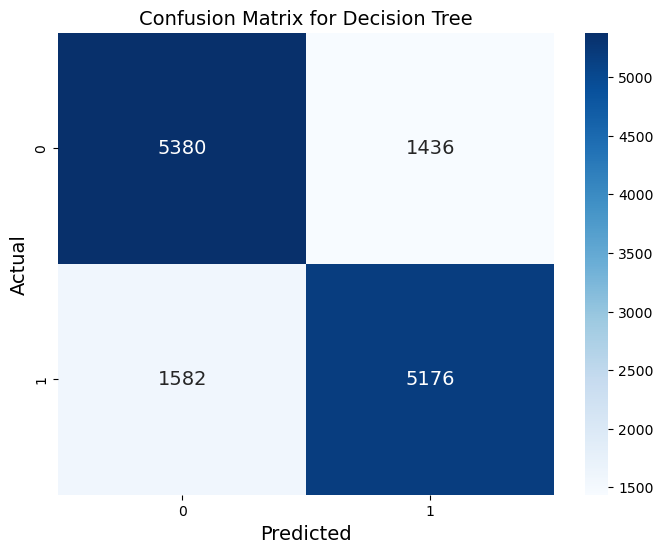

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Decision Tree', fontsize = 14)

In [20]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, DT_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      6816
           1       0.78      0.77      0.77      6758

    accuracy                           0.78     13574
   macro avg       0.78      0.78      0.78     13574
weighted avg       0.78      0.78      0.78     13574



# ROC Plot for Decision Tree

In [22]:
from sklearn.metrics import roc_curve, auc

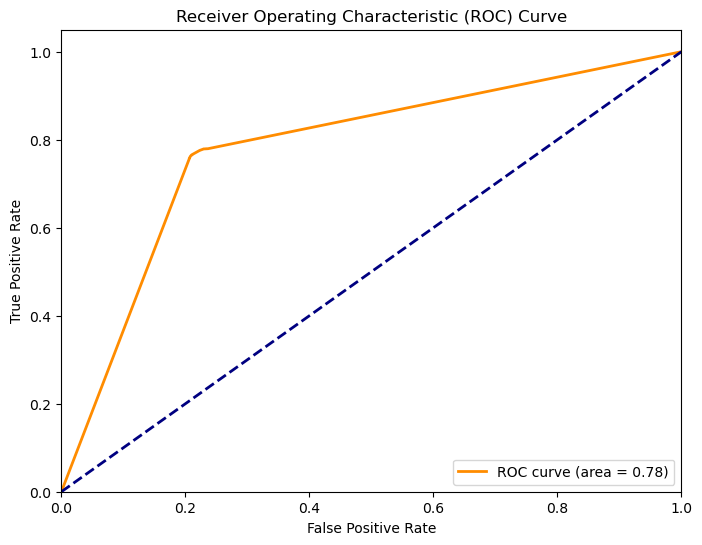

In [23]:
# Predicting probabilities of the positive class for the test set
y_probt = tree.predict_proba(X_test)[:, 1]

# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_t, tpr_t, thresholds_t = roc_curve(y_test, y_probt)

# Calculating the area under the ROC curve (AUC)
roc_auc_t = auc(fpr_t, tpr_t)

# Plotting the ROC curve with custom figure size
plt.figure(figsize=(8, 6))  # Set width to 8 inches and height to 6 inches
plt.plot(fpr_t, tpr_t, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_t)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning for Decision Tree

In [24]:
param_grid = {'max_depth': [3, 5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['auto', 'sqrt', 'log2']}

Create the GridSearchCV object

In [25]:
from sklearn.model_selection import GridSearchCV
grid_search_dt = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

In [26]:
grid_search_dt.fit(X_train, y_train)

C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Tong\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [27]:
best_params_dt = grid_search_dt.best_params_
best_estimator_dt = grid_search_dt.best_estimator_

In [28]:
best_tree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', **best_params_dt)

In [29]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='sqrt', min_samples_split=5)

# Evaluate Performance Decision Tree after Hyperparameter

In [30]:
y_pred_besttree = best_tree.predict(X_test)

In [31]:
conf_newdt = confusion_matrix(y_test, y_pred_besttree)
plt.figure(figsize=(8, 6))
print(conf_newdt)

[[5617 1199]
 [1431 5327]]


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree After Hyper Tuning')

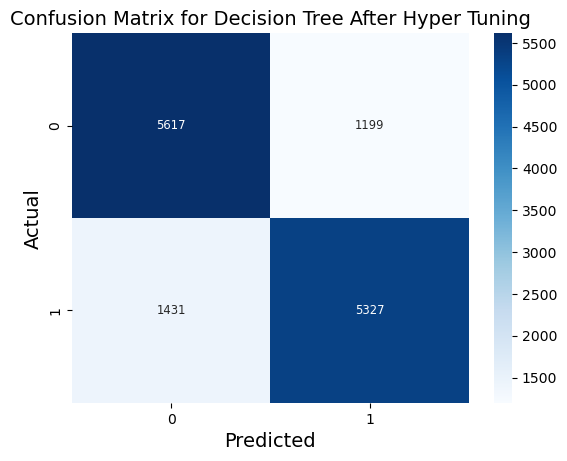

In [32]:
sns.heatmap(conf_newdt, annot=True, fmt='d', cmap='Blues',annot_kws={"size": "small"})
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Decision Tree After Hyper Tuning', fontsize = 14)

In [33]:
print("Classification Report:")
print(classification_report(y_test, y_pred_besttree))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6816
           1       0.82      0.79      0.80      6758

    accuracy                           0.81     13574
   macro avg       0.81      0.81      0.81     13574
weighted avg       0.81      0.81      0.81     13574



# ROC Plot for New Decision Tree Model

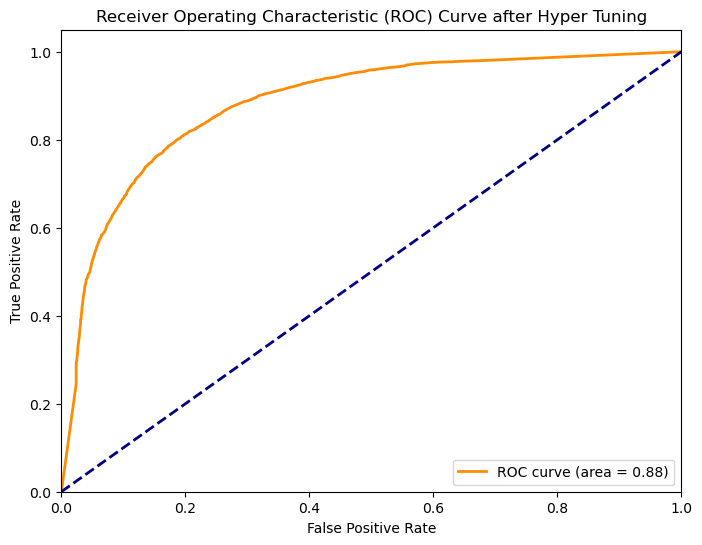

In [35]:
# Predicting probabilities of the positive class for the test set
y_probt_best = best_tree .predict_proba(X_test)[:, 1]

# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_tb, tpr_tb, thresholds_tb = roc_curve(y_test, y_probt_best)

# Calculating the area under the ROC curve (AUC)
roc_auc_tb = auc(fpr_tb, tpr_tb)

# Plotting the ROC curve with custom figure size
plt.figure(figsize=(8, 6))  # Set width to 8 inches and height to 6 inches
plt.plot(fpr_tb, tpr_tb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve after Hyper Tuning')
plt.legend(loc="lower right")
plt.show()

# Perform Random Forest Classification

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
CLF_RDF = RandomForestClassifier()

Fit the classifier with x and y data

In [41]:
CLF_RDF = CLF_RDF.fit(X_train, y_train)
Y_PRED_CLFRDF = CLF_RDF.predict(X_test)

# Evaluate the Performance Random Forest

In [42]:
confusion_matrix_rdm = confusion_matrix(y_test, Y_PRED_CLFRDF)
print(confusion_matrix_rdm)

[[5457 1359]
 [1311 5447]]


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

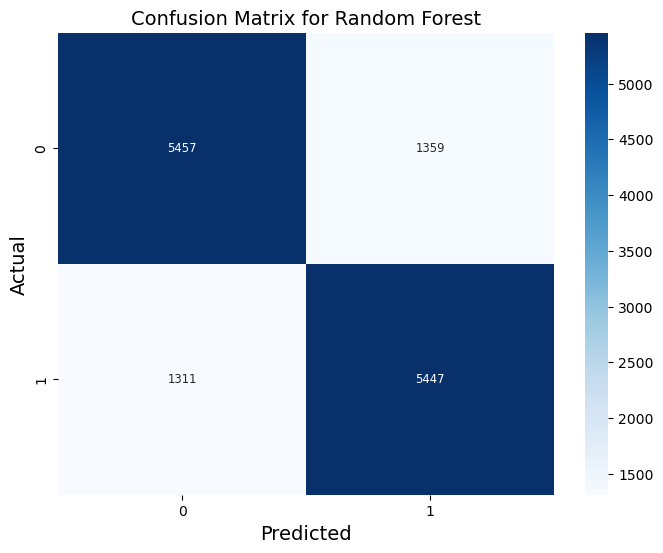

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rdm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": "small"})
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Random Forest', fontsize = 14)

In [49]:
print("Classification Report:")
print(classification_report(y_test, Y_PRED_CLFRDF))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      6816
           1       0.80      0.81      0.80      6758

    accuracy                           0.80     13574
   macro avg       0.80      0.80      0.80     13574
weighted avg       0.80      0.80      0.80     13574



# ROC Plot for Random Forest

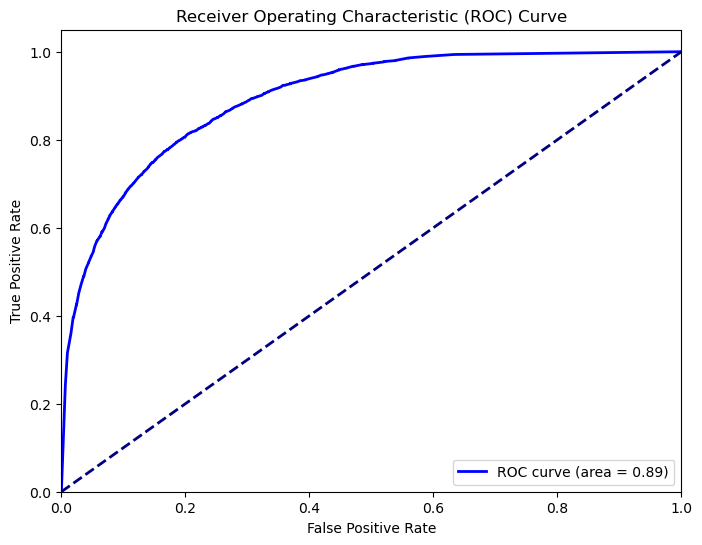

In [131]:
# Predicting probabilities of the positive class for the test set
y_prob_rf = CLF_RDF.predict_proba(X_test)[:, 1]

# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Calculating the area under the ROC curve (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curve with custom figure size
plt.figure(figsize=(8, 6))  # Set width to 8 inches and height to 6 inches
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning for Random Forest

In [46]:
param_grid = {'max_depth': [3, 5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['auto', 'sqrt', 'log2']}

Create the GridSearchCV object

In [47]:
grid_search_rf = GridSearchCV(CLF_RDF, param_grid, cv=5, scoring='accuracy')

In [48]:
grid_search_rf.fit(X_train, y_train)

C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Tong\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [50]:
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
print("Best Parameters:", best_params_rf)

Best Parameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [51]:
best_rf = RandomForestClassifier(**best_params_rf)

In [52]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5)

# Evaluate the Performance of New Random Forest Model

In [53]:
y_pred_bestrf = best_rf.predict(X_test)
conf_newrf = confusion_matrix(y_test, y_pred_bestrf)
plt.figure(figsize=(8, 6))
print(conf_newrf)

[[5652 1164]
 [1243 5515]]


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix for Random Forest After Hyper Tuning')

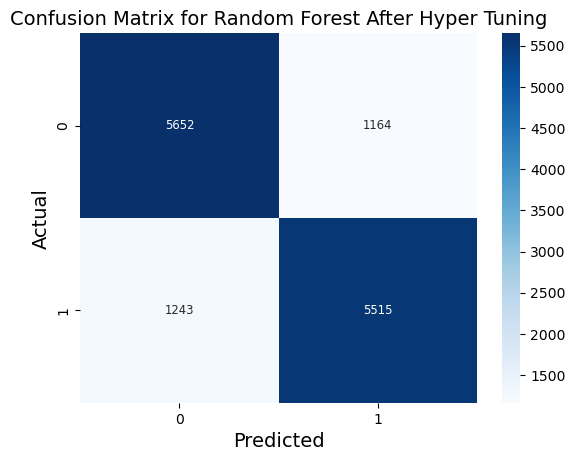

In [54]:
sns.heatmap(conf_newrf, annot=True, fmt='d', cmap='Blues',annot_kws={"size": "small"})
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Random Forest After Hyper Tuning', fontsize = 14)

In [55]:
print("Classification Report:")
print(classification_report(y_test, y_pred_bestrf))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6816
           1       0.83      0.82      0.82      6758

    accuracy                           0.82     13574
   macro avg       0.82      0.82      0.82     13574
weighted avg       0.82      0.82      0.82     13574



# ROC Plot for New Random Forest Model

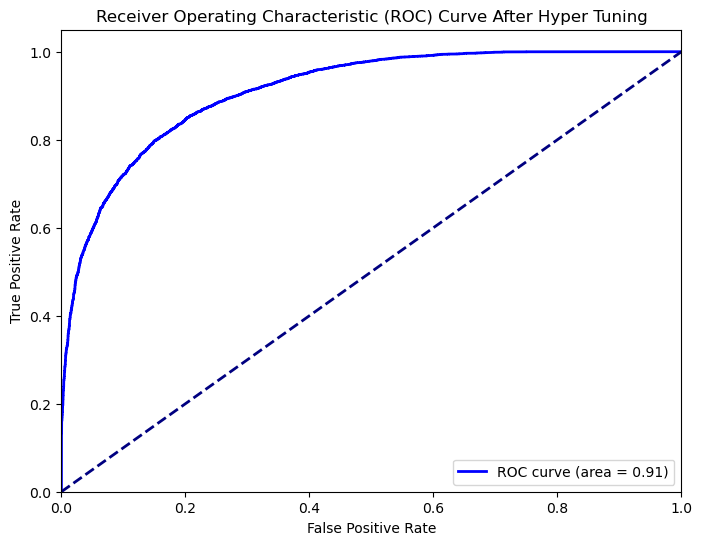

In [130]:
# Predicting probabilities of the positive class for the test set
y_probrf_best = best_rf.predict_proba(X_test)[:, 1]

# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_rfb, tpr_rfb, thresholds_rfb = roc_curve(y_test, y_probrf_best)

# Calculating the area under the ROC curve (AUC)
roc_auc_rfb = auc(fpr_rfb, tpr_rfb)

# Plotting the ROC curve with custom figure size
plt.figure(figsize=(8, 6))  # Set width to 8 inches and height to 6 inches
plt.plot(fpr_rfb, tpr_rfb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rfb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve After Hyper Tuning')
plt.legend(loc="lower right")
plt.show()

# Perform XgBoost Classifier 

In [59]:
from xgboost import XGBClassifier
clf_xgb = xgb.XGBClassifier(seed=42)

In [60]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
y_pred_xgb = clf_xgb.predict(X_test)

In [64]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_xgb

array([[5659, 1157],
       [1243, 5515]], dtype=int64)

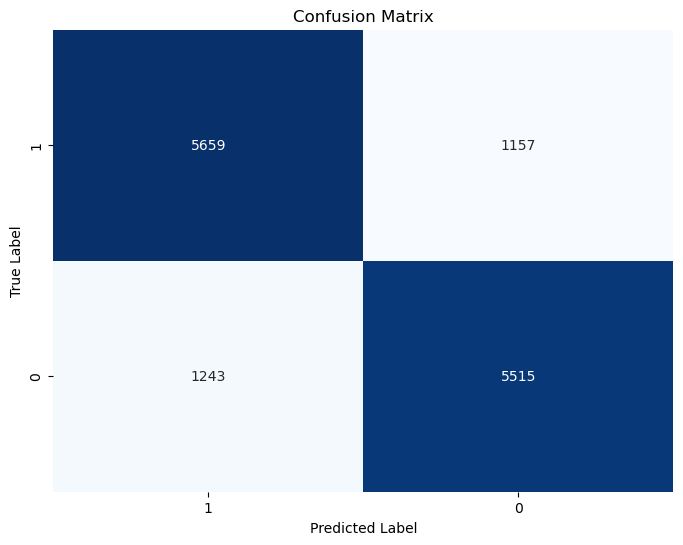

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["1", "0"], yticklabels=["1", "0"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [82]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      6816
           1       0.83      0.82      0.82      6758

    accuracy                           0.82     13574
   macro avg       0.82      0.82      0.82     13574
weighted avg       0.82      0.82      0.82     13574



# ROC Plot for XgBoost Model

In [66]:
y_prob_xgb = clf_xgb.predict_proba(X_test)[:, 1]

In [67]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

In [68]:
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

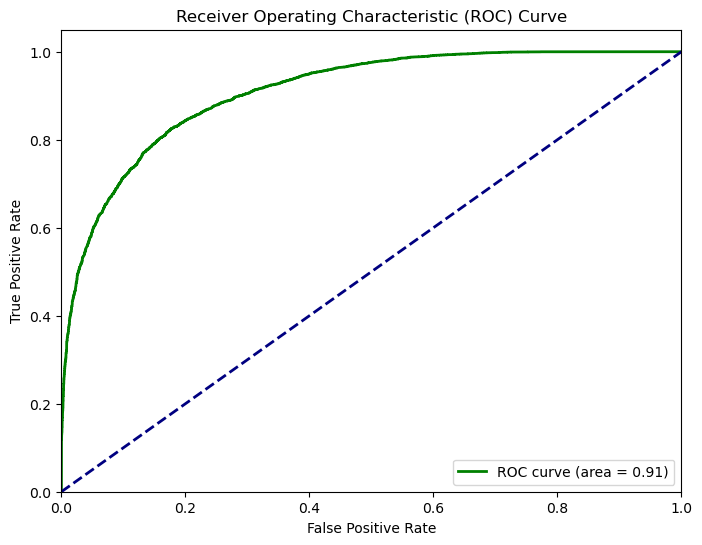

In [129]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='Green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning for XgBoost Model

In [71]:
param_grid = {'max_depth': [3, 5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['auto', 'sqrt', 'log2']}

In [72]:
grid_search_xgb = GridSearchCV(clf_xgb, param_grid, cv=5, scoring='accuracy')

In [73]:
grid_search_xgb.fit(X_train, y_train)

C:\Users\Tong\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Tong\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Tong\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_sampl

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [74]:
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_
print("Best Parameters:", best_params_xgb)

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [75]:
best_xgb = xgb.XGBClassifier(**best_params_xgb)

In [76]:
best_xgb.fit(X_train, y_train)

C:\Users\Tong\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:27:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_features='auto',
              max_leaves=None, min_child_weight=None, min_samples_leaf=1,
              min_samples_split=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, ...)

# Evaluate the Performance of New XgBoost Model

In [77]:
y_pred_bestxgb = best_xgb.predict(X_test)

In [78]:
conf_newxgb = confusion_matrix(y_test, y_pred_bestxgb)
plt.figure(figsize=(8, 6))
print(conf_newxgb)

[[5645 1171]
 [1249 5509]]


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix for XgBoost After Hyper Tuning')

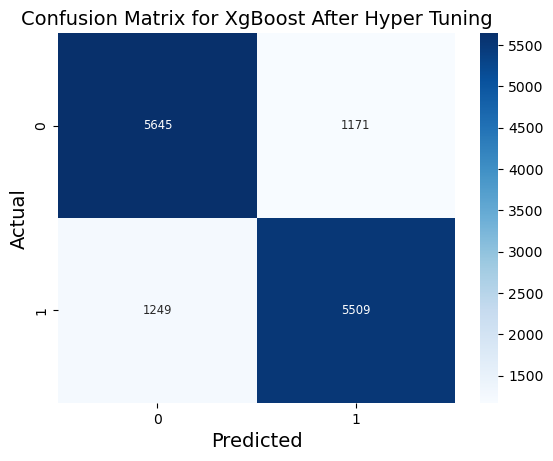

In [79]:
sns.heatmap(conf_newxgb, annot=True, fmt='d', cmap='Blues',annot_kws={"size": "small"})
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for XgBoost After Hyper Tuning', fontsize = 14)

In [80]:
print("Classification Report:")
print(classification_report(y_test, y_pred_bestxgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6816
           1       0.82      0.82      0.82      6758

    accuracy                           0.82     13574
   macro avg       0.82      0.82      0.82     13574
weighted avg       0.82      0.82      0.82     13574



# ROC Plot for New XgBoost Model

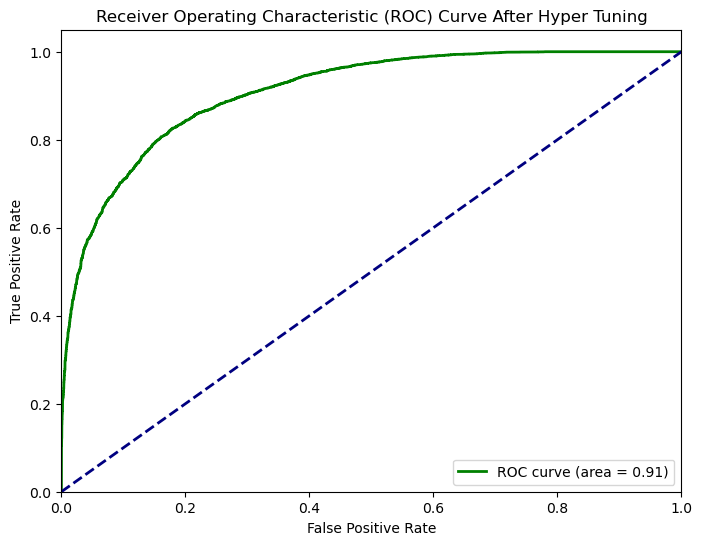

In [128]:
# Predicting probabilities of the positive class for the test set
y_probxgb_best = best_xgb.predict_proba(X_test)[:, 1]

# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_xgbb, tpr_xgbb, thresholds_xgbb = roc_curve(y_test, y_probxgb_best)

# Calculating the area under the ROC curve (AUC)
roc_auc_xgbb = auc(fpr_xgbb, tpr_xgbb)

# Plotting the ROC curve with custom figure size
plt.figure(figsize=(8, 6))  # Set width to 8 inches and height to 6 inches
plt.plot(fpr_xgbb, tpr_xgbb, color='Green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgbb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve After Hyper Tuning')
plt.legend(loc="lower right")
plt.show()

# Perform Logistic Regression 

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

# Evaluate Logistic Regression Model

In [89]:
y_pred_log = log_reg_model.predict(X_test)

In [90]:
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix_log)

[[5770 1046]
 [1738 5020]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

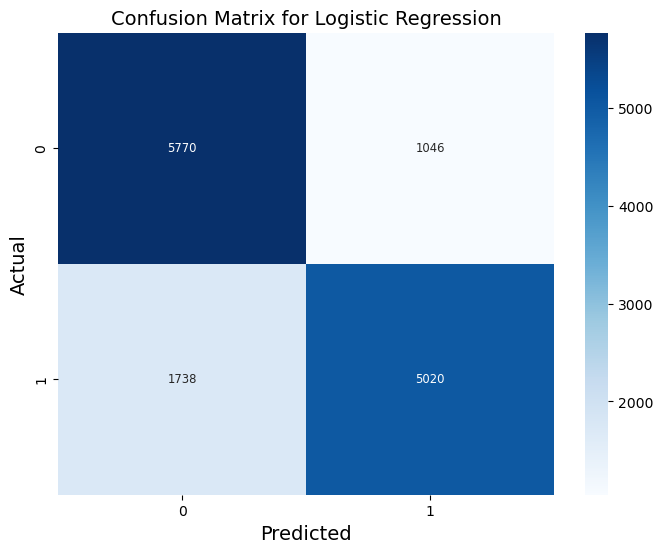

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_log, annot=True, fmt='d', cmap='Blues', annot_kws={"size": "small"})
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 14)

In [112]:
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      6816
           1       0.83      0.74      0.78      6758

    accuracy                           0.79     13574
   macro avg       0.80      0.79      0.79     13574
weighted avg       0.80      0.79      0.79     13574



# ROC Plot for Logistic Regression

In [92]:
y_prob_log = log_reg_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_prob_log)

In [93]:
roc_auc_log = auc(fpr_log, tpr_log)

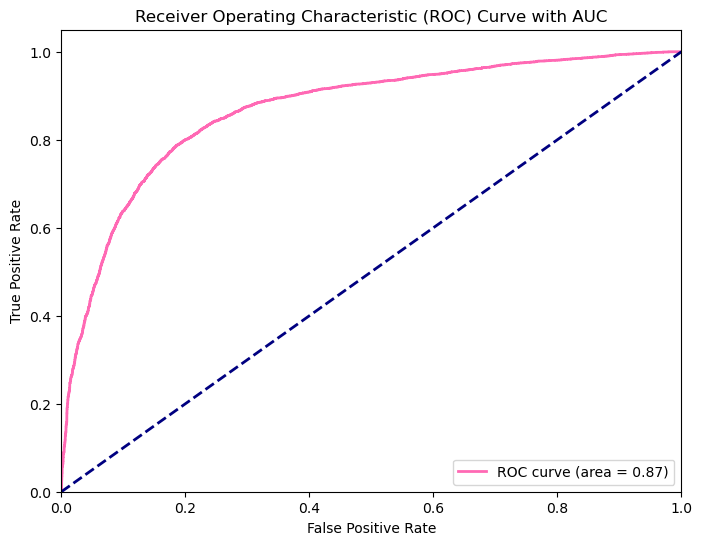

In [127]:
# Plot ROC curve with AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='hotpink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with AUC')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning for Logistic Regression Model

In [100]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear', 'saga'],  # Solver algorithm for optimization
}

In [101]:
log_reg_newmodel = LogisticRegression()

In [103]:
grid_search_log = GridSearchCV(estimator=log_reg_newmodel, param_grid=param_grid, cv=5, scoring='accuracy')

In [104]:
grid_search_log.fit(X_train, y_train)

C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [105]:
best_params_log = grid_search_log.best_params_
best_estimator_log = grid_search_log.best_estimator_
print("Best Parameters:", best_params_log)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [106]:
best_log = LogisticRegression(**best_params_log)

In [107]:
best_log.fit(X_train, y_train)

C:\Users\Tong\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=10, penalty='l1', solver='liblinear')

# Evaluate the Performance of New Logistic Regression Model

In [108]:
y_pred_bestlog = best_log.predict(X_test)

In [109]:
conf_newlog = confusion_matrix(y_test, y_pred_bestlog)
plt.figure(figsize=(8, 6))
print(conf_newlog)

[[5778 1038]
 [1714 5044]]


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression After Hyper Tuning')

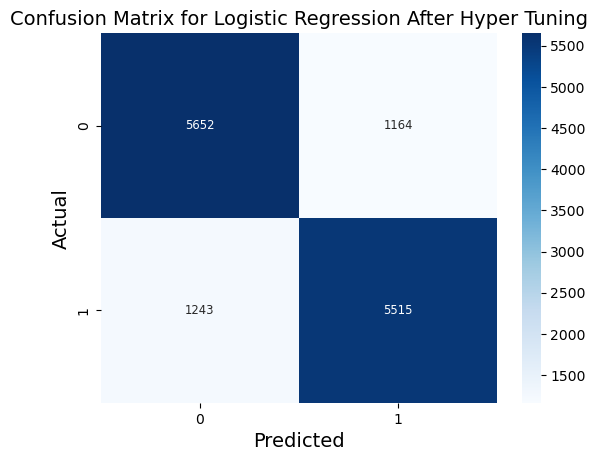

In [110]:
sns.heatmap(conf_newrf, annot=True, fmt='d', cmap='Blues',annot_kws={"size": "small"})
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Logistic Regression After Hyper Tuning', fontsize = 14)

In [111]:
print("Classification Report:")
print(classification_report(y_test, y_pred_bestlog))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      6816
           1       0.83      0.75      0.79      6758

    accuracy                           0.80     13574
   macro avg       0.80      0.80      0.80     13574
weighted avg       0.80      0.80      0.80     13574



# ROC Plot for New Logistic Regression Model

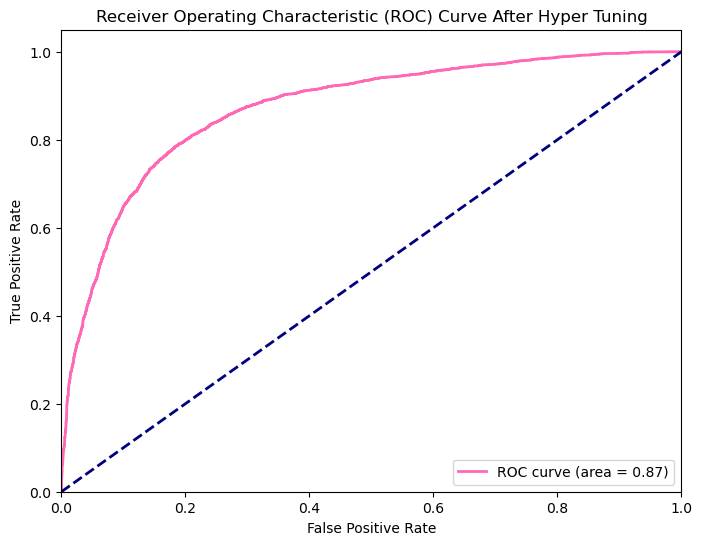

In [126]:
# Predicting probabilities of the positive class for the test set
y_pred_bestlog = best_log.predict_proba(X_test)[:, 1]

# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_logb, tpr_logb, thresholds_logb = roc_curve(y_test, y_pred_bestlog)

# Calculating the area under the ROC curve (AUC)
roc_auc_logb = auc(fpr_logb, tpr_logb)

# Plotting the ROC curve with custom figure size
plt.figure(figsize=(8, 6))  # Set width to 8 inches and height to 6 inches
plt.plot(fpr_logb, tpr_logb, color='hotpink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve After Hyper Tuning')
plt.legend(loc="lower right")
plt.show()

# Combine all roc curves

In [1]:
plt.figure(figsize=(8, 6))  # Set width to 8 inches and height to 6 inches

# Plot ROC curve for the decision tree classifier
plt.plot(fpr_tb, tpr_tb, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_tb)

# Plot ROC curve for the random forest classifier
plt.plot(fpr_rfb, tpr_rfb, color='blue', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rfb)

# Plot ROC curve for the XgBoost classifier
plt.plot(fpr_xgb, tpr_xgb, color='Green', lw=2, label='XgBoost ROC curve (area = %0.2f)' % roc_auc_xgb)

# Plot ROC curve for the Logistic Regression
plt.plot(fpr_logb, tpr_logb, color='hotpink', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_logb)

# Plotting the reference line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All Best Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


NameError: name 'plt' is not defined